In [100]:
pip install nfl_data_py

Note: you may need to restart the kernel to use updated packages.


In [101]:
#first we see the 2024 play by play data

import nfl_data_py as nfl

# Load play-by-play data for one or more seasons
df = nfl.import_pbp_data([2024])

# Show first 5 rows
print(df.head())


2024 done.
Downcasting floats.
   play_id          game_id old_game_id home_team away_team season_type  week  \
0      1.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG     1   
1     40.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG     1   
2     61.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG     1   
3     83.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG     1   
4    108.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG     1   

  posteam posteam_type defteam  ... out_of_bounds  home_opening_kickoff  \
0    None         None    None  ...           0.0                   0.0   
1     ARI         away     BUF  ...           0.0                   0.0   
2     ARI         away     BUF  ...           0.0                   0.0   
3     ARI         away     BUF  ...           0.0                   0.0   
4     ARI         away     BUF  ...           0.0                   0.0   

     qb_epa  xyac_epa  xyac_mea

In [102]:
#here we examine all the columns to see what is related to first down
import nfl_data_py as nfl

# Load play-by-play data for 2024
df = nfl.import_pbp_data([2024])

# Get a list of all column titles
column_list = df.columns.tolist()

# Print the column names
print(df.columns.tolist())

2024 done.
Downcasting floats.
['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_s

In [103]:
#now we take only data where first down is successful, success first down is 1
#other options are n/a or 0 we don't need either of these for analysis

import nfl_data_py as nfl

# Load play-by-play data for a specific season (e.g., 2023)
df = nfl.import_pbp_data([2024])

# Filter for plays where a first down was achieved
first_down_plays = df[df['first_down'] == 1]

# Show the first 5 rows of first down plays
print(first_down_plays.head())

2024 done.
Downcasting floats.
    play_id          game_id old_game_id home_team away_team season_type  \
3      83.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG   
5     133.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG   
8     199.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG   
11    287.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG   
14    381.0  2024_01_ARI_BUF  2024090801       BUF       ARI         REG   

    week posteam posteam_type defteam  ... out_of_bounds  \
3      1     ARI         away     BUF  ...           0.0   
5      1     ARI         away     BUF  ...           0.0   
8      1     ARI         away     BUF  ...           0.0   
11     1     ARI         away     BUF  ...           0.0   
14     1     ARI         away     BUF  ...           0.0   

    home_opening_kickoff    qb_epa  xyac_epa  xyac_mean_yardage  \
3                    0.0  2.028874  1.345418           9.321221   
5                

In [104]:
#This section narrows down to just the first_down column, the column is n/a, 0 or 1. 1 represents a successful first down
#here we can see some general counts on plays vs total first downs for 2024 season regardless of team

import nfl_data_py as nfl

# Load play-by-play data for 2024
df = nfl.import_pbp_data([2024])

# Select only the 'first_down' column
first_downs = df[['first_down']]

# Show the first 5 rows
print(first_downs.head())

# Total number of rows (i.e., plays)
total_plays = len(df)

# Total number of first downs
total_first_downs = df['first_down'].sum()

print("Total plays:", total_plays)
print("Total first downs:", total_first_downs)

2024 done.
Downcasting floats.
   first_down
0         NaN
1         0.0
2         0.0
3         1.0
4         0.0
Total plays: 49492
Total first downs: 11148.0


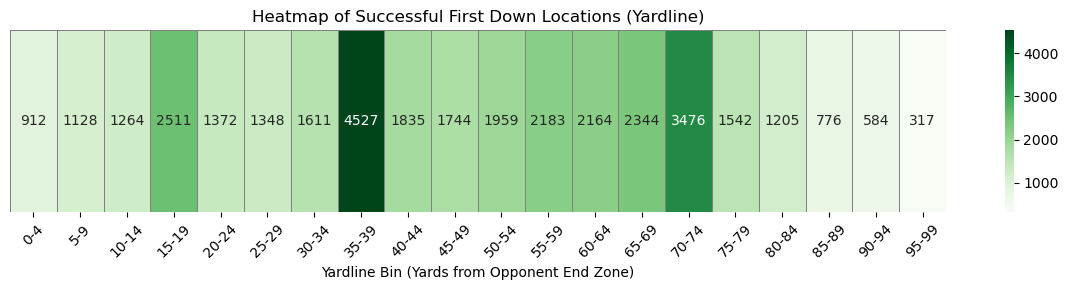

In [105]:
#we'll now visualize where all the successful first downs are on the field

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your play-by-play DataFrame for 2024 loaded previously

# Filter to only successful first down plays
first_down_plays = df[df['first_down'] != 1]

# Extract the yardline_100 and side_of_field (if exists) or just yardline_100
# yardline_100 is yards from opponent's end zone (0 to 100)
# For a heatmap, bin the yardline_100 into segments (for us here every 5 yards)

# Create bins for yardline_100, e.g., every 5 yards
first_down_plays['yard_bin'] = pd.cut(first_down_plays['yardline_100'], bins=range(0, 105, 5), right=False)

# Count first downs per bin
yard_counts = first_down_plays.groupby('yard_bin').size().reset_index(name='count')

# Create a simple heatmap-like bar plot since data is 1D (along the field length)
plt.figure(figsize=(12, 3))
sns.heatmap([yard_counts['count']], cmap='Greens', cbar=True, linewidths=0.5, linecolor='gray', annot=True, fmt='d')

plt.title('Heatmap of Successful First Down Locations (Yardline)')
plt.yticks([], [])  # Hide y-axis ticks since it's just one row
plt.xticks(ticks=[i + 0.5 for i in range(len(yard_counts))], labels=[f"{int(interval.left)}-{int(interval.right-1)}" for interval in yard_counts['yard_bin']], rotation=45)
plt.xlabel('Yardline Bin (Yards from Opponent End Zone)')

plt.tight_layout()
plt.show()

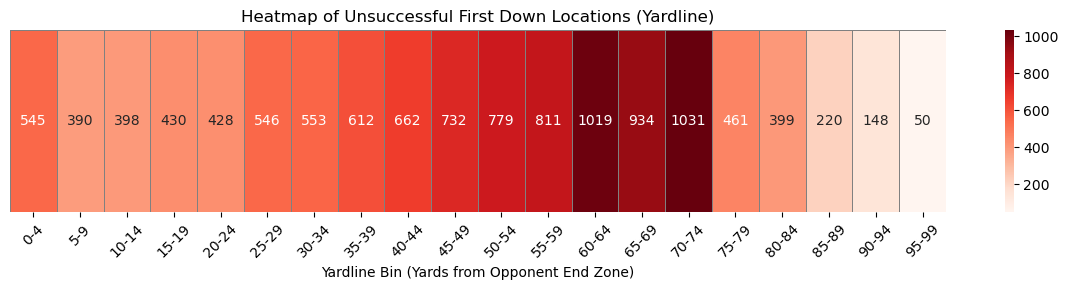

In [106]:
#we'll now visualize where all the unsuccessful first downs are on the field

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your play-by-play DataFrame for 2024 loaded previously

# Filter to unsuccessful first down plays
first_down_plays = df[df['first_down'] == 1]

# Extract the yardline_100 and side_of_field (if exists) or just yardline_100
# yardline_100 is yards from opponent's end zone (0 to 100)
# For a heatmap, bin the yardline_100 into segments (for us here every 5 yards)

# Create bins for yardline_100, e.g., every 5 yards
first_down_plays['yard_bin'] = pd.cut(first_down_plays['yardline_100'], bins=range(0, 105, 5), right=False)

# Count first downs per bin
yard_counts = first_down_plays.groupby('yard_bin').size().reset_index(name='count')

# Create a simple heatmap-like bar plot since data is 1D (along the field length)
plt.figure(figsize=(12, 3))
sns.heatmap([yard_counts['count']], cmap='Reds', cbar=True, linewidths=0.5, linecolor='gray', annot=True, fmt='d')

plt.title('Heatmap of Unsuccessful First Down Locations (Yardline)')
plt.yticks([], [])  # Hide y-axis ticks since it's just one row
plt.xticks(ticks=[i + 0.5 for i in range(len(yard_counts))], labels=[f"{int(interval.left)}-{int(interval.right-1)}" for interval in yard_counts['yard_bin']], rotation=45)
plt.xlabel('Yardline Bin (Yards from Opponent End Zone)')

plt.tight_layout()
plt.show()

In [107]:
#we will now examine first down by team
#posteam = team that had possession on the play (i.e. the offensive team).
#We're filtering only rows where first_down == 1.
#Then grouping by posteam and counting those rows.

import nfl_data_py as nfl

# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter to plays where a first down occurred
first_down_plays = df[df['first_down'] == 1]

# Group by offensive team and count first downs
first_downs_by_team = first_down_plays.groupby('posteam')['first_down'].count()

# Sort and display
print(first_downs_by_team.sort_values(ascending=False))


2024 done.
Downcasting floats.
posteam
WAS    447
PHI    440
BAL    438
DET    433
BUF    423
TB     405
KC     402
LA     374
CIN    373
MIN    367
ATL    359
ARI    356
GB     354
SF     349
HOU    342
MIA    340
SEA    327
DEN    327
DAL    326
LAC    324
PIT    324
IND    314
NYJ    310
LV     309
TEN    304
NYG    301
CLE    301
NO     301
NE     298
CHI    296
JAX    295
CAR    289
Name: first_down, dtype: int64


2024 done.
Downcasting floats.


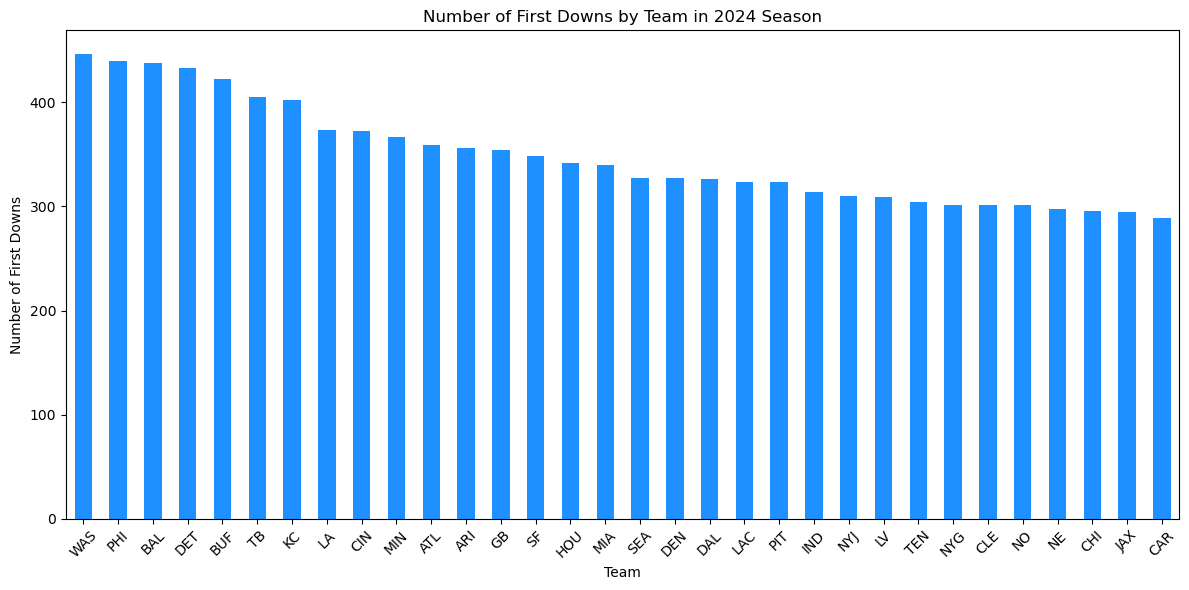

In [108]:
#now we'll visualize as a bar chart
import nfl_data_py as nfl
import matplotlib.pyplot as plt

# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter plays with first down
first_down_plays = df[df['first_down'] == 1]

# Group by offensive team and count first downs
first_downs_by_team = first_down_plays.groupby('posteam')['first_down'].count()

# Sort by descending number of first downs
first_downs_by_team = first_downs_by_team.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
first_downs_by_team.plot(kind='bar', color='dodgerblue')

plt.title('Number of First Downs by Team in 2024 Season')
plt.xlabel('Team')
plt.ylabel('Number of First Downs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
#We'll now see which players were in most first downs plays in 2024
#there's no single column with all 22 players in a formation so we'll include all players

import nfl_data_py as nfl
import pandas as pd

# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter for plays that resulted in a first down
first_down_plays = df[df['first_down'] == 1]

# List of possible player columns to check
possible_player_cols = [
    'passer_player_name',
    'rusher_player_name',
    'receiver_player_name',
    'interceptor_player_name',
    'tackle_player_name',
    'sack_player_name',
    'forced_fumble_player_1_name',
    'forced_fumble_player_2_name',
    'fumble_recovery_1_player_name',
    'fumble_recovery_2_player_name',
    'qb_hit_player_name',
    'kickoff_returner_player_name',
    'punt_returner_player_name',
    'kickoff_player_name',
    'punt_player_name',
    'penalty_player_name'
]

# Make sure we only use existing columns
existing_player_cols = [col for col in possible_player_cols if col in first_down_plays.columns]

# Collect all player-team pairs
player_team_pairs = []

for col in existing_player_cols:
    temp_df = first_down_plays[[col, 'posteam']].dropna()
    temp_df.columns = ['Player', 'Team']
    player_team_pairs.append(temp_df)

# Combine all pairs into one DataFrame
all_player_teams = pd.concat(player_team_pairs)

# Count occurrences of each player-team pair
player_team_counts = all_player_teams.value_counts().reset_index()
player_team_counts.columns = ['Player', 'Team', 'First_Down_Count']

# Sort and show top results
player_team_counts = player_team_counts.sort_values(by='First_Down_Count', ascending=False).reset_index(drop=True)

# Show top 20
print(player_team_counts.head(20))

2024 done.
Downcasting floats.
          Player Team  First_Down_Count
0      J.Daniels  WAS               281
1      P.Mahomes   KC               279
2      L.Jackson  BAL               278
3       J.Burrow  CIN               270
4        J.Allen  BUF               269
5         J.Goff  DET               266
6     B.Mayfield   TB               264
7        J.Hurts  PHI               259
8      S.Darnold  MIN               248
9       C.Stroud  HOU               233
10       G.Smith  SEA               228
11         B.Nix  DEN               226
12      K.Murray  ARI               223
13       B.Purdy   SF               214
14    M.Stafford   LA               213
15     J.Herbert  LAC               208
16    C.Williams  CHI               201
17     A.Rodgers  NYJ               201
18        J.Love   GB               175
19  T.Tagovailoa  MIA               169


In [110]:
#Now that we know all the players we'll see which one was most effcient cost wise
#we'll combine salary csv and first down players
#this creates a new column for cost per first down for the indvidual player
#we have to use fuzzy match to combine the names

import pandas as pd
from fuzzywuzzy import process

# Load data
df_salary = pd.read_csv('overthecap-earnings.csv')
df_salary = df_salary[df_salary['year'] == 2024]  # Filter only 2024

# Fix known data issues
df_salary['player_name'] = df_salary['player_name'].str.strip()
player_first_down_counts['Player'] = player_first_down_counts['Player'].str.strip()

# Fuzzy match function
def get_best_match(player, choices, threshold=85):
    match, score = process.extractOne(player, choices)
    return match if score >= threshold else None

# Get salary names
salary_names = df_salary['player_name'].unique().tolist()

# Fuzzy match each player
player_first_down_counts['matched_salary_name'] = player_first_down_counts['Player'].apply(
    lambda x: get_best_match(x, salary_names)
)

# Merge on matched player names
merged_df = pd.merge(
    player_first_down_counts,
    df_salary,
    left_on='matched_salary_name',
    right_on='player_name',
    how='left'
)

# Drop players with no salary info
merged_df = merged_df.dropna(subset=['base_salary'])

# Compute salary per first down
merged_df['salary_per_first_down'] = merged_df['base_salary'] / merged_df['First_Down_Count']

# Format salary columns
merged_df['base_salary'] = merged_df['base_salary'].apply(lambda x: f"${x:,.2f}")
merged_df['salary_per_first_down'] = merged_df['salary_per_first_down'].apply(lambda x: f"${x:,.2f}")

# Clean final output
final_df = merged_df[['Player', 'team', 'First_Down_Count', 'base_salary', 'salary_per_first_down']]

# Remove duplicates: if player matched multiple teams, keep the one with most first downs
final_df = final_df.sort_values(['Player', 'First_Down_Count'], ascending=[True, False]).drop_duplicates('Player')

# Sort by salary efficiency
final_df = final_df.sort_values('salary_per_first_down')

# Display
print(final_df.to_string(index=False))

             Player       team  First_Down_Count    base_salary salary_per_first_down
           K.Coburn   Chargers                 1  $1,000,000.00         $1,000,000.00
           K.Dugger   Chargers                 1  $1,000,000.00         $1,000,000.00
           K.Fulton   Chargers                 1  $1,000,000.00         $1,000,000.00
           K.Gordon   Chargers                 1  $1,000,000.00         $1,000,000.00
           K.Vildor   Chargers                 1  $1,000,000.00         $1,000,000.00
           K.Street   Chargers                 1  $1,000,000.00         $1,000,000.00
         Dj.Johnson   Panthers                 1  $1,000,136.00         $1,000,136.00
         Z.Harrison    Falcons                 1  $1,003,111.00         $1,003,111.00
           K.Murray     Giants               223    $225,000.00             $1,008.97
         T.Marshall    Raiders                 1  $1,055,000.00         $1,055,000.00
          I.Rodgers     Eagles                 1  $1,0

In [111]:
pip install rapidfuzz

Note: you may need to restart the kernel to use updated packages.


In [112]:
#Now that we have all the NFL players we'll bring in our scraped earnings data

import pandas as pd

df = pd.read_csv('overthecap-earnings.csv')

print(df.head())



        player_name  year     team  base_salary  prorated_bonus  roster_bonus  \
0    Andrew DePaola  2024  Vikings      1210000        116666.0           0.0   
1         Zach Wood  2024   Saints      1210000        200000.0           NaN   
2         Jon Weeks  2024   Texans      1210000        167500.0           NaN   
3  James Winchester  2024   Chiefs      1210000        167500.0           NaN   
4       Rick Lovato  2024   Eagles      1210000         50000.0           NaN   

   workout_bonus  Unnamed: 7  guaranteed_salary  capnumber cap_percent  \
0        15000.0         NaN                0.0    1341666        0.5%   
1            NaN         NaN           130000.0    1410000        0.5%   
2            0.0         NaN                0.0    1152500        0.4%   
3            0.0         NaN           985000.0    1152500        0.5%   
4            0.0         NaN            50000.0    1035000        0.4%   

   cash_paid  
0    1225000  
1    1210000  
2    1377500  
3    137

2024 done.
Downcasting floats.


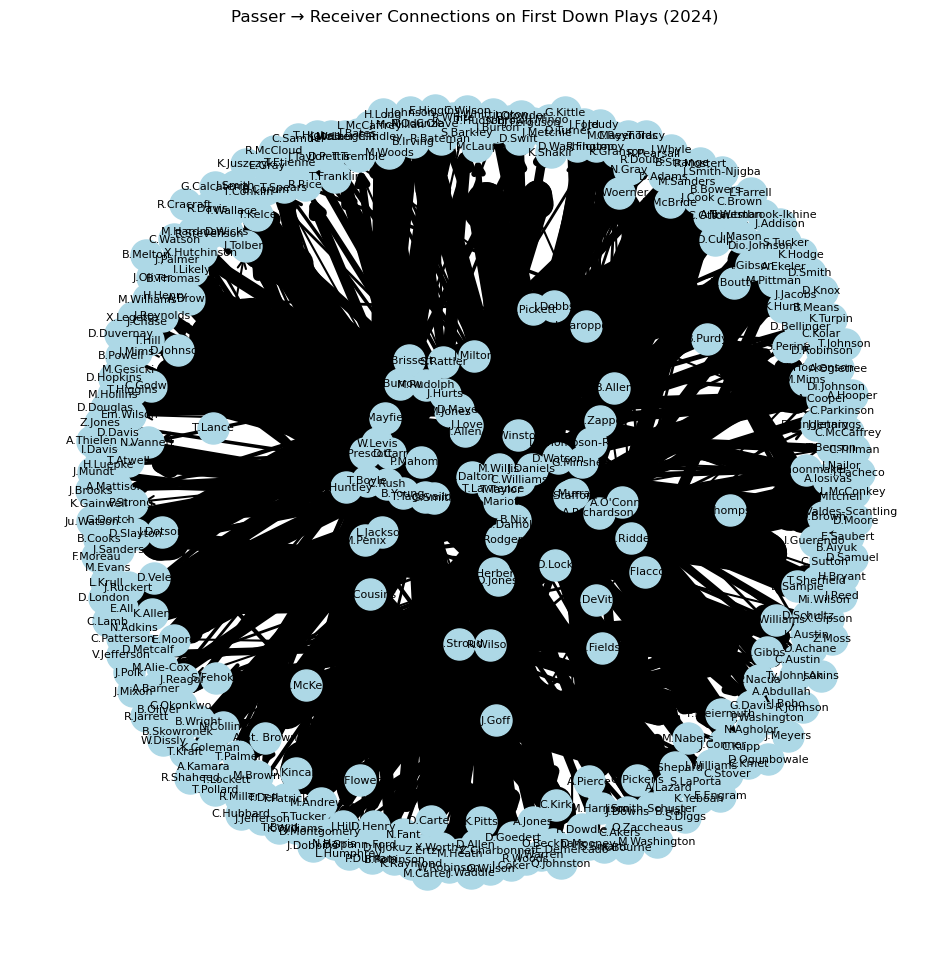

In [113]:
#now that we know there are 951 unique players we'll attempt to visualize them 
#this puts together passer and receiver pairs since 900 players can be hard to visualize at once

import nfl_data_py as nfl
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter for plays resulting in a first down and where both passer and receiver are known
fd_pass_plays = df[
    (df['first_down'] == 1) &
    (df['passer_player_name'].notna()) &
    (df['receiver_player_name'].notna())
]

# Create edge list: (passer, receiver)
edges = list(zip(fd_pass_plays['passer_player_name'], fd_pass_plays['receiver_player_name']))

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (count how many times each passer → receiver pair occurs)
for edge in edges:
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] += 1
    else:
        G.add_edge(edge[0], edge[1], weight=1)

# Optionally, filter edges to show only those with weight > threshold (e.g., 2)
edges_to_draw = [(u, v) for u, v, w in G.edges(data='weight') if w > 2]

H = G.edge_subgraph(edges_to_draw).copy()

# Plotting
plt.figure(figsize=(12,12))

# Position nodes using spring layout (forces)
pos = nx.spring_layout(H, k=0.5, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(H, pos, node_size=500, node_color='lightblue')

# Draw edges with widths proportional to weight
weights = [H[u][v]['weight'] for u,v in H.edges()]
nx.draw_networkx_edges(H, pos, width=[w*0.5 for w in weights], arrowstyle='->', arrowsize=15)

# Draw labels
nx.draw_networkx_labels(H, pos, font_size=8)

plt.title("Passer → Receiver Connections on First Down Plays (2024)")
plt.axis('off')
plt.show()


In [114]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


2024 done.
Downcasting floats.


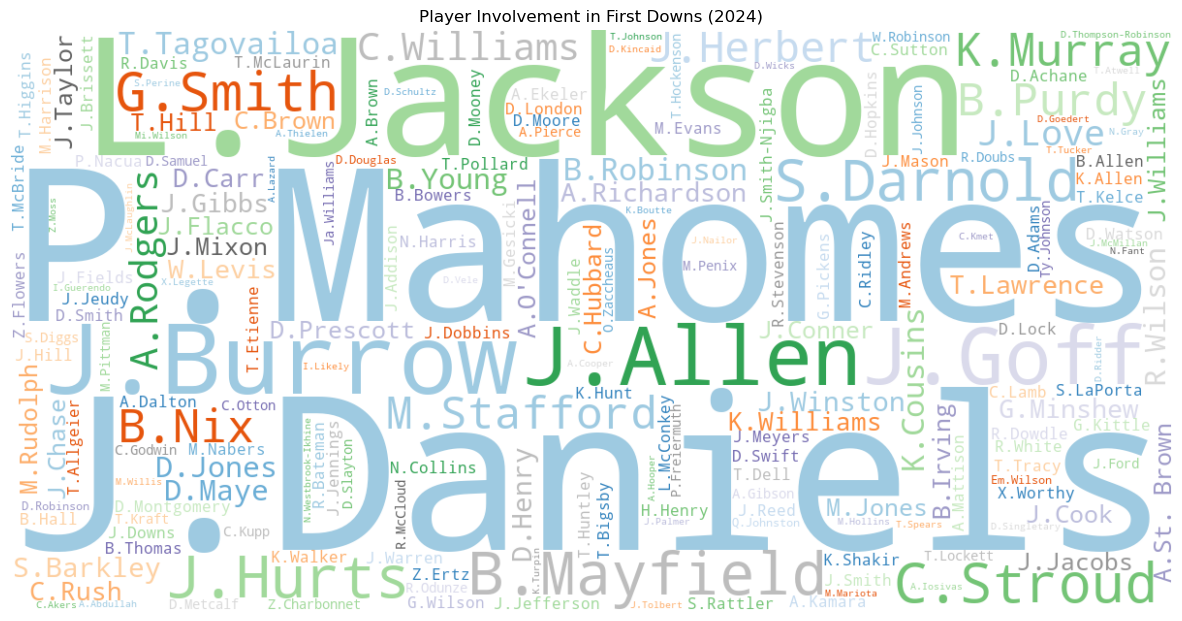

In [115]:
#here we're creating a word cloud of just the players with the names showing larger based on first downs

import nfl_data_py as nfl
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter for plays resulting in a first down
first_down_plays = df[df['first_down'] == 1]

# List of possible player columns to check
possible_player_cols = [
    'passer_player_name',
    'rusher_player_name',
    'receiver_player_name',
    'interceptor_player_name',
    'tackle_player_name',
    'sack_player_name',
    'forced_fumble_player_1_name',
    'forced_fumble_player_2_name',
    'fumble_recovery_1_player_name',
    'fumble_recovery_2_player_name',
    'qb_hit_player_name',
    'kickoff_returner_player_name',
    'punt_returner_player_name',
    'kickoff_player_name',
    'punt_player_name',
    'penalty_player_name'
]

# Keep only columns that exist
existing_player_cols = [col for col in possible_player_cols if col in first_down_plays.columns]

# Stack all player columns into one Series and drop NaNs
all_players_series = first_down_plays[existing_player_cols].stack().dropna()

# Count occurrences of each player (number of first down involvements)
player_counts = all_players_series.value_counts().to_dict()

# Create the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='tab20c').generate_from_frequencies(player_counts)

# Plot the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Player Involvement in First Downs (2024)')
plt.show()

In [116]:
#our research shows that while there are a lot of players involved we may actually want to consider the most relevant players
#here we're looking at passer reciever pairs and their success rate on first down

import nfl_data_py as nfl
import pandas as pd

# Load 2024 PBP data (if not already loaded)
df = nfl.import_pbp_data([2024])

# Filter for plays with a first down via pass, and valid passer + receiver names
first_down_passes = df[
    (df['first_down_pass'] == 1) & 
    df['passer_player_name'].notna() & 
    df['receiver_player_name'].notna() & 
    df['posteam'].notna()
]

# Group by passer, receiver, and offensive team (posteam), count occurrences
pair_counts = (
    first_down_passes
    .groupby(['passer_player_name', 'receiver_player_name', 'posteam'])
    .size()
    .reset_index(name='First_Down_Count')
    .sort_values(by='First_Down_Count', ascending=False)
)

print(pair_counts.head(20))

2024 done.
Downcasting floats.
    passer_player_name receiver_player_name posteam  First_Down_Count
351             J.Goff          A.St. Brown     DET                81
291           J.Burrow              J.Chase     CIN                75
568          S.Darnold          J.Jefferson     MIN                64
449           K.Murray            T.McBride     ARI                63
69               B.Nix             C.Sutton     DEN                61
59          B.Mayfield              M.Evans      TB                60
379          J.Herbert           L.McConkey     LAC                59
40           A.Rodgers             G.Wilson     NYJ                58
130           C.Stroud            N.Collins     HOU                58
386            J.Hurts              A.Brown     PHI                58
310          J.Daniels           T.McLaurin     WAS                57
254            G.Smith       J.Smith-Njigba     SEA                56
546          P.Mahomes              T.Kelce      KC        

In [117]:
#with there being so many pairs we can narrow down to top 5 pairs per team

import nfl_data_py as nfl
import pandas as pd

# Load 2024 PBP data
df = nfl.import_pbp_data([2024])

# Filter for first down passing plays with valid passer and receiver
first_down_passes = df[
    (df['first_down_pass'] == 1) & 
    df['passer_player_name'].notna() & 
    df['receiver_player_name'].notna() & 
    df['posteam'].notna()
]

# Group by team, then passer and receiver, count occurrences
grouped = (
    first_down_passes
    .groupby(['posteam', 'passer_player_name', 'receiver_player_name'])
    .size()
    .reset_index(name='First_Down_Count')
)

# Now, for example, get top 5 pairs per team
top_pairs_per_team = grouped.groupby('posteam').apply(
    lambda x: x.sort_values('First_Down_Count', ascending=False).head(5)
).reset_index(drop=True)

print(top_pairs_per_team)

2024 done.
Downcasting floats.
    posteam passer_player_name receiver_player_name  First_Down_Count
0       ARI           K.Murray            T.McBride                63
1       ARI           K.Murray           M.Harrison                43
2       ARI           K.Murray            Mi.Wilson                27
3       ARI           K.Murray             J.Conner                17
4       ARI           K.Murray             G.Dortch                16
..      ...                ...                  ...               ...
155     WAS          J.Daniels           T.McLaurin                57
156     WAS          J.Daniels               Z.Ertz                46
157     WAS          J.Daniels          O.Zaccheaus                26
158     WAS          J.Daniels              D.Brown                21
159     WAS          J.Daniels              N.Brown                20

[160 rows x 4 columns]


In [118]:
#now we'll look at the top pair per team

import nfl_data_py as nfl
import pandas as pd

# Load 2024 PBP data
df = nfl.import_pbp_data([2024])

# Filter for first down passing plays with valid passer and receiver
first_down_passes = df[
    (df['first_down_pass'] == 1) & 
    df['passer_player_name'].notna() & 
    df['receiver_player_name'].notna() & 
    df['posteam'].notna()
]

# Group by team, passer, receiver and count occurrences
grouped = (
    first_down_passes
    .groupby(['posteam', 'passer_player_name', 'receiver_player_name'])
    .size()
    .reset_index(name='First_Down_Count')
)

# For each team, get the top pair by First_Down_Count
top_pair_per_team = grouped.loc[grouped.groupby('posteam')['First_Down_Count'].idxmax()]

print(top_pair_per_team)

2024 done.
Downcasting floats.
    posteam passer_player_name receiver_player_name  First_Down_Count
9       ARI           K.Murray            T.McBride                63
14      ATL          K.Cousins             D.London                52
41      BAL          L.Jackson            Z.Flowers                48
48      BUF            J.Allen             K.Shakir                42
71      CAR            B.Young            A.Thielen                26
88      CHI         C.Williams              D.Moore                43
102     CIN           J.Burrow              J.Chase                75
137     CLE          J.Winston              J.Jeudy                36
144     DAL             C.Rush               C.Lamb                27
176     DEN              B.Nix             C.Sutton                61
197     DET             J.Goff          A.St. Brown                81
222      GB             J.Love              R.Doubs                30
238     HOU           C.Stroud            N.Collins        

In [119]:
import nfl_data_py as nfl
import pandas as pd
from fuzzywuzzy import process

# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter for first down passing plays with valid passer and receiver
first_down_passes = df[
    (df['first_down_pass'] == 1) & 
    df['passer_player_name'].notna() & 
    df['receiver_player_name'].notna() & 
    df['posteam'].notna()
]

# Group by team, passer, receiver and count first down occurrences
grouped = (
    first_down_passes
    .groupby(['posteam', 'passer_player_name', 'receiver_player_name'])
    .size()
    .reset_index(name='First_Down_Count')
)

# Get top pair per team by First_Down_Count
top_pair_per_team = grouped.loc[grouped.groupby('posteam')['First_Down_Count'].idxmax()].reset_index(drop=True)

# Load salary data (filtered for 2024)
df_salary = pd.read_csv('overthecap-earnings.csv')
df_salary = df_salary[df_salary['year'] == 2024]
df_salary['player_name'] = df_salary['player_name'].str.strip()

# Function to fuzzy match player names with salary data
def get_best_match(player, choices, threshold=85):
    match, score = process.extractOne(player, choices)
    return match if score >= threshold else None

salary_names = df_salary['player_name'].unique().tolist()

# Fuzzy match passer and receiver names to salary data
top_pair_per_team['passer_match'] = top_pair_per_team['passer_player_name'].apply(lambda x: get_best_match(x, salary_names))
top_pair_per_team['receiver_match'] = top_pair_per_team['receiver_player_name'].apply(lambda x: get_best_match(x, salary_names))

# Merge salaries for passer
top_pair_per_team = top_pair_per_team.merge(
    df_salary[['player_name', 'base_salary']],
    left_on='passer_match',
    right_on='player_name',
    how='left'
).rename(columns={'base_salary': 'passer_salary'}).drop(columns=['player_name'])

# Merge salaries for receiver
top_pair_per_team = top_pair_per_team.merge(
    df_salary[['player_name', 'base_salary']],
    left_on='receiver_match',
    right_on='player_name',
    how='left'
).rename(columns={'base_salary': 'receiver_salary'}).drop(columns=['player_name'])

# Fill missing salaries with 0 (or you can drop those rows if you prefer)
top_pair_per_team['passer_salary'] = top_pair_per_team['passer_salary'].fillna(0)
top_pair_per_team['receiver_salary'] = top_pair_per_team['receiver_salary'].fillna(0)

# Calculate total salary and salary per first down
top_pair_per_team['total_salary'] = top_pair_per_team['passer_salary'] + top_pair_per_team['receiver_salary']
top_pair_per_team['salary_per_first_down'] = top_pair_per_team['total_salary'] / top_pair_per_team['First_Down_Count']

# Format dollar amounts
top_pair_per_team['passer_salary'] = top_pair_per_team['passer_salary'].apply(lambda x: f"${x:,.2f}")
top_pair_per_team['receiver_salary'] = top_pair_per_team['receiver_salary'].apply(lambda x: f"${x:,.2f}")
top_pair_per_team['total_salary'] = top_pair_per_team['total_salary'].apply(lambda x: f"${x:,.2f}")
top_pair_per_team['salary_per_first_down'] = top_pair_per_team['salary_per_first_down'].apply(lambda x: f"${x:,.2f}")

# Sort by salary per first down (lowest first)
top_pair_per_team = top_pair_per_team.sort_values(by='salary_per_first_down')

# Show relevant columns
print(top_pair_per_team[['posteam', 'passer_player_name', 'receiver_player_name', 'First_Down_Count', 'passer_salary', 'receiver_salary', 'total_salary', 'salary_per_first_down']])

2024 done.
Downcasting floats.
   posteam passer_player_name receiver_player_name  First_Down_Count  \
8      DAL             C.Rush               C.Lamb                27   
13     IND           J.Flacco              J.Downs                27   
6      CIN           J.Burrow              J.Chase                75   
17     LAC          J.Herbert           L.McConkey                59   
26     PIT           R.Wilson            G.Pickens                26   
15      KC          P.Mahomes              T.Kelce                54   
18      LV          G.Minshew             B.Bowers                33   
28     SEA            G.Smith       J.Smith-Njigba                56   
27     SEA            G.Smith       J.Smith-Njigba                56   
0      ARI           K.Murray            T.McBride                63   
1      ATL          K.Cousins             D.London                52   
4      CAR            B.Young            A.Thielen                26   
32     WAS          J.Daniels    

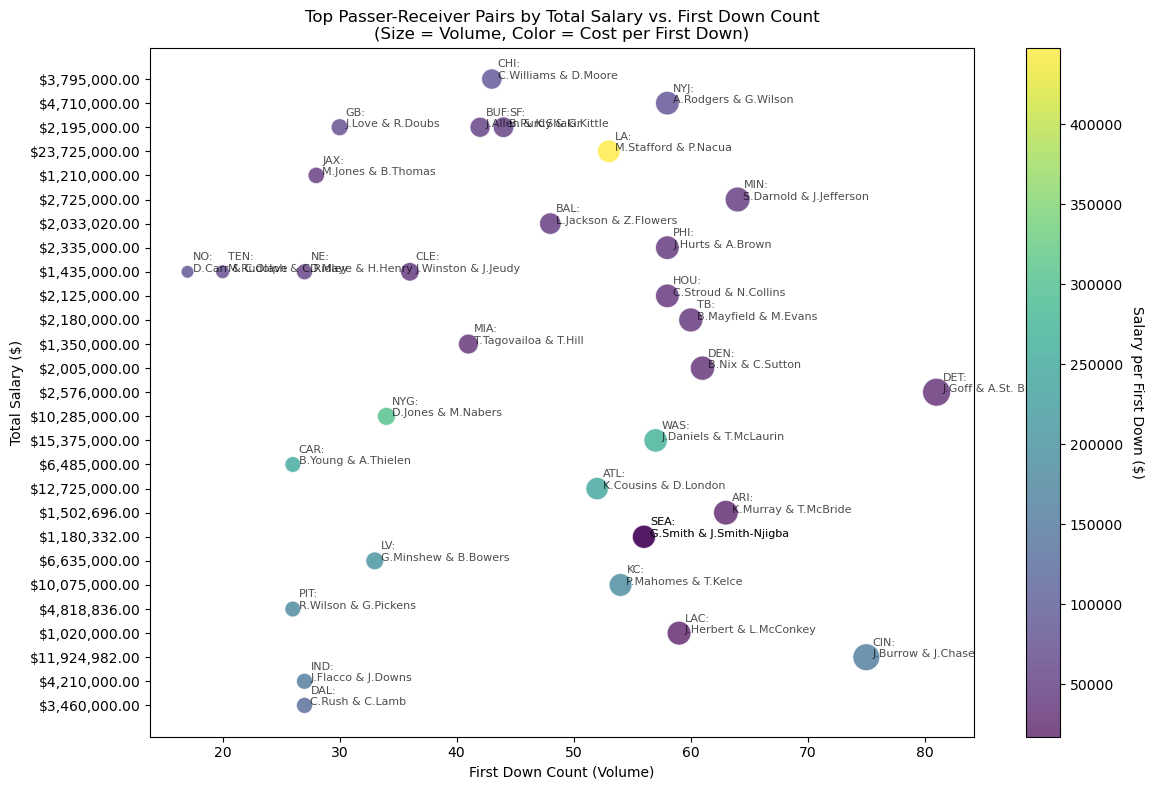

In [121]:
#now lets visualize as a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure salary_per_first_down is numeric (remove $ and commas if formatted)
df_plot = top_pair_per_team.copy()
df_plot['salary_per_first_down_num'] = df_plot['salary_per_first_down'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 8))

# Scatter plot
scatter = plt.scatter(
    x=df_plot['First_Down_Count'],           # X-axis: volume
    y=df_plot['total_salary'],                # Y-axis: total salary
    c=df_plot['salary_per_first_down_num'],  # Color: cost efficiency
    s=df_plot['First_Down_Count'] * 5,       # Size proportional to volume (optional scaling)
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.7
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Salary per First Down ($)', rotation=270, labelpad=15)

# Labels & title
plt.xlabel('First Down Count (Volume)')
plt.ylabel('Total Salary ($)')
plt.title('Top Passer-Receiver Pairs by Total Salary vs. First Down Count\n(Size = Volume, Color = Cost per First Down)')

# Annotate with team and pair names for better context (optional)
for _, row in df_plot.iterrows():
    plt.text(
        row['First_Down_Count'] + 0.5, 
        row['total_salary'], 
        f"{row['posteam']}:\n{row['passer_player_name']} & {row['receiver_player_name']}",
        fontsize=8,
        alpha=0.7
    )

plt.tight_layout()
plt.show()